In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
FILENAME = 'datasets/combined_and_cleaned.csv'

df = pd.read_csv(FILENAME)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   urls              2528 non-null   object
 1   titles            2528 non-null   object
 2   authors           2528 non-null   object
 3   published_dates   2528 non-null   object
 4   articles_content  2528 non-null   object
 5   news_org          2528 non-null   object
dtypes: object(6)
memory usage: 118.6+ KB


urls  \
0     https://www.rappler.com/newsbreak/explainers/w...   
1     https://www.rappler.com/newsbreak/iq/timeline-...   
2     https://www.rappler.com/nation/philippines-rec...   
3     https://www.rappler.com/nation/philippines-gra...   
4     https://www.rappler.com/nation/philippines-rec...   
...                                                 ...   
2523  https://mb.com.ph/2020/03/07/virus-folding-puz...   
2524  https://mb.com.ph/2020/02/25/needed-vaccine-in...   
2525  https://mb.com.ph/2020/02/22/phap-to-immediate...   
2526  https://mb.com.ph/2020/02/14/as-scientists-rac...   
2527  https://mb.com.ph/2020/02/12/scientists-financ...   

                                                 titles               authors  \
0     Here’s why COVID-19 vaccines haven’t arrived i...        SOFIA TOMACRUZ   
1     TIMELINE: The Philippines’ 2021 COVID-19 vacci...        SOFIA TOMACRUZ   
2     After initial delay, Philippines to receive As...        SOFIA TOMACRUZ   
3     Philippines grants emergency approval for Sino...        SOFIA TOMACRUZ   
4     Philippines receives first COVID-19 vaccine de...        SOFIA TOMACRUZ   
...                                                 ...                   ...   
2523  Virus-folding puzzle game might help find vacc...  manilabulletin_admin   
2524      Needed: vaccine & info on how Covid-1 spreads  manilabulletin_admin   
2525  PHAP to immediately bring new COVID-19 vaccine...  manilabulletin_admin   
2526  As scientists race to produce Covid-19 vaccine...  manilabulletin_admin   
2527  Scientists, financiers meet to develop vaccine...  manilabulletin_admin   

                  published_dates  \
0             2021-02-18 09:22:00   
1             2021-02-04 19:43:00   
2             2021-03-03 14:41:00   
3             2021-02-22 12:19:00   
4             2021-02-28 16:16:00   
...                           ...   
2523      March 7, 2020, 12:00 AM   
2524  February 25, 2020, 12:00 AM   
2525  February 22, 2020, 12:00 AM   
2526  February 14, 2020, 12:00 AM   
2527  February 12, 2020, 12:00 AM   

                                       articles_content        news_org  
0     MANILA, PHILIPPINES\r\nThe Philippine governme...         Rappler  
1     MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...         Rappler  
2     MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...         Rappler  
3     MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...         Rappler  
4     MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...         Rappler  
...                                                 ...             ...  
2523  By Rizal ObanilThis development has the making...  manilabulletin  
2524  The search for a vaccine for the coronavirus, ...  manilabulletin  
2525  By Bernie Cahiles-MagkilatThe Pharmaceutical A...  manilabulletin  
2526  By Analou De VeraAn official of the World Heal...  manilabulletin  
2527  By Aaron RecuencoHealth experts from around th...  manilabulletin  

[2528 rows x 6 columns]

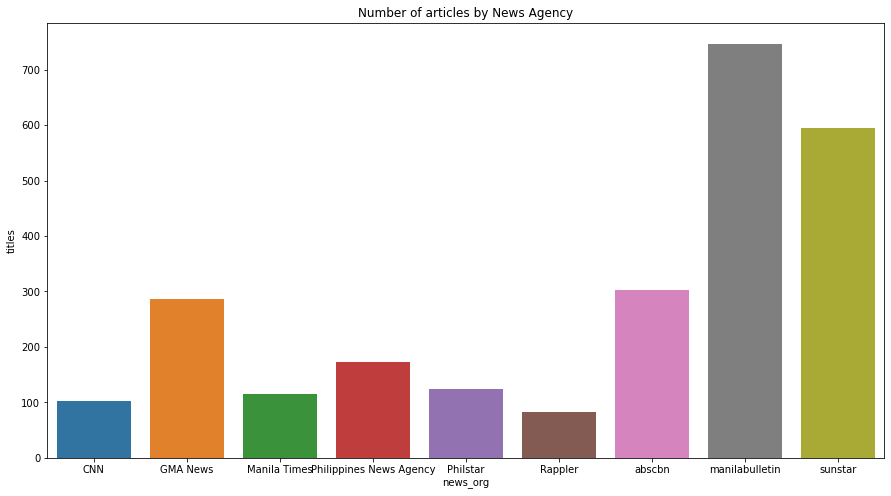

In [3]:
# Distribution of the Different Articles
distribution = df.groupby(['news_org'])['titles'].count().reset_index()
plt.figure(figsize=(15, 8))
sns.barplot(x="news_org", y="titles", data=distribution)
plt.title('Number of articles by News Agency')
plt.show()

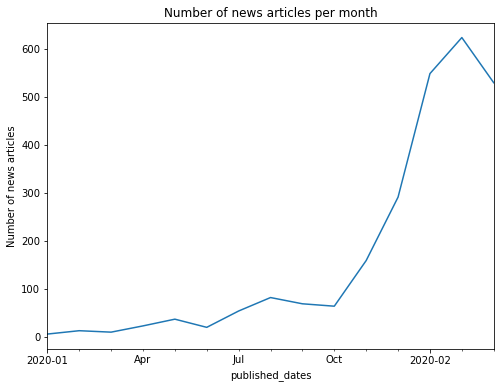

In [4]:
#Get the monthly frequency of the news
df['published_dates'] = pd.to_datetime(df['published_dates'])
date = df.set_index('published_dates')
date = date['titles'].resample('M').count() #M for month
#line chart of monthly articles

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
date.plot(ax=ax, kind='line')

#Uncomment for cleaner x labels
ax.set_xticklabels([x.strftime('%Y-%m') for x in date.index])

plt.ylabel('Number of news articles')
plt.title('Number of news articles per month')
plt.show()

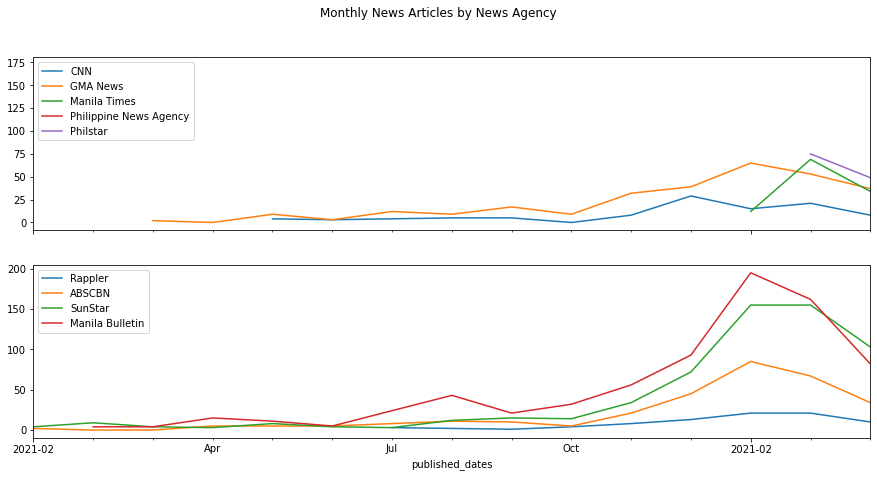

In [5]:
#line chart of monthly streams
news_org = df.set_index('published_dates')

#default is line so you can omit kind= parameter
data1 = news_org[news_org['news_org']=='CNN']['titles'].resample('M').count()
data2 = news_org[news_org['news_org']=='GMA News']['titles'].resample('M').count()
data3 = news_org[news_org['news_org']=='Manila Times']['titles'].resample('M').count()
data4 = news_org[news_org['news_org']=='Philippines News Agency']['titles'].resample('M').count()
data5 = news_org[news_org['news_org']=='Philstar']['titles'].resample('M').count()
data6 = news_org[news_org['news_org']=='Rappler']['titles'].resample('M').count()
data7 = news_org[news_org['news_org']=='abscbn']['titles'].resample('M').count()
data8 = news_org[news_org['news_org']=='sunstar']['titles'].resample('M').count()
data9 = news_org[news_org['news_org']=='manilabulletin']['titles'].resample('M').count()

fig, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(15,7))
fig.suptitle('Monthly News Articles by News Agency')

data1.plot(ax=ax1, label='CNN')
data2.plot(ax=ax1, label='GMA News')
data3.plot(ax=ax1, label='Manila Times')
data4.plot(ax=ax1, label='Philippine News Agency')
data5.plot(ax=ax1, label='Philstar')
data6.plot(ax=ax2, label='Rappler')
data7.plot(ax=ax2, label='ABSCBN')
data8.plot(ax=ax2, label='SunStar')
data9.plot(ax=ax2, label='Manila Bulletin')
ax1.set_xticklabels([x.strftime('%Y-%m') for x in news_org.index])
ax2.set_xticklabels([x.strftime('%Y-%m') for x in news_org.index])
ax1.legend(loc="upper left")
ax2.legend(loc="upper left")


In [6]:
FILENAME = 'datasets/model.csv'
df = pd.read_csv(FILENAME)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   urls                           2528 non-null   object 
 1   titles                         2528 non-null   object 
 2   authors                        2528 non-null   object 
 3   published_dates                2528 non-null   object 
 4   articles_content               2528 non-null   object 
 5   news_org                       2528 non-null   object 
 6   articles_summary               2528 non-null   object 
 7   dominant_topic                 2528 non-null   float64
 8   topic_percentage_contribution  2528 non-null   float64
 9   keywords                       2528 non-null   object 
 10  text                           2528 non-null   object 
 11  polarity                       2528 non-null   float64
 12  negativity                     2528 non-null   f

urls  \
0     https://www.rappler.com/newsbreak/explainers/w...   
1     https://www.rappler.com/newsbreak/iq/timeline-...   
2     https://www.rappler.com/nation/philippines-rec...   
3     https://www.rappler.com/nation/philippines-gra...   
4     https://www.rappler.com/nation/philippines-rec...   
...                                                 ...   
2523  https://mb.com.ph/2020/03/07/virus-folding-puz...   
2524  https://mb.com.ph/2020/02/25/needed-vaccine-in...   
2525  https://mb.com.ph/2020/02/22/phap-to-immediate...   
2526  https://mb.com.ph/2020/02/14/as-scientists-rac...   
2527  https://mb.com.ph/2020/02/12/scientists-financ...   

                                                 titles               authors  \
0     Here’s why COVID-19 vaccines haven’t arrived i...        SOFIA TOMACRUZ   
1     TIMELINE: The Philippines’ 2021 COVID-19 vacci...        SOFIA TOMACRUZ   
2     After initial delay, Philippines to receive As...        SOFIA TOMACRUZ   
3     Philippines grants emergency approval for Sino...        SOFIA TOMACRUZ   
4     Philippines receives first COVID-19 vaccine de...        SOFIA TOMACRUZ   
...                                                 ...                   ...   
2523  Virus-folding puzzle game might help find vacc...  manilabulletin_admin   
2524      Needed: vaccine & info on how Covid-1 spreads  manilabulletin_admin   
2525  PHAP to immediately bring new COVID-19 vaccine...  manilabulletin_admin   
2526  As scientists race to produce Covid-19 vaccine...  manilabulletin_admin   
2527  Scientists, financiers meet to develop vaccine...  manilabulletin_admin   

                  published_dates  \
0             2021-02-18 09:22:00   
1             2021-02-04 19:43:00   
2             2021-03-03 14:41:00   
3             2021-02-22 12:19:00   
4             2021-02-28 16:16:00   
...                           ...   
2523      March 7, 2020, 12:00 AM   
2524  February 25, 2020, 12:00 AM   
2525  February 22, 2020, 12:00 AM   
2526  February 14, 2020, 12:00 AM   
2527  February 12, 2020, 12:00 AM   

                                       articles_content        news_org  \
0     MANILA, PHILIPPINES\r\nThe Philippine governme...         Rappler   
1     MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...         Rappler   
2     MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...         Rappler   
3     MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...         Rappler   
4     MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...         Rappler   
...                                                 ...             ...   
2523  By Rizal ObanilThis development has the making...  manilabulletin   
2524  The search for a vaccine for the coronavirus, ...  manilabulletin   
2525  By Bernie Cahiles-MagkilatThe Pharmaceutical A...  manilabulletin   
2526  By Analou De VeraAn official of the World Heal...  manilabulletin   
2527  By Aaron RecuencoHealth experts from around th...  manilabulletin   

                                       articles_summary  dominant_topic  \
0     Why do we need an indemnification fund?An inde...             6.0   
1     Now, the Philippines is just weeks away from s...             0.0   
2     (UPDATED) Malacañang says 487,200 doses from t...             3.0   
3     FDA Director General Eric Domingo made the ann...             3.0   
4     (3rd UPDATE) The arrival of donated COVID-19 v...             3.0   
...                                                 ...             ...   
2523  By Rizal ObanilThis development has the making...            15.0   
2524  The search for a vaccine for the coronavirus, ...             3.0   
2525  By Bernie Cahiles-MagkilatThe Pharmaceutical A...             3.0   
2526  By Analou De VeraAn official of the World Heal...             3.0   
2527  By Aaron RecuencoHealth experts from around th...            13.0   

      topic_percentage_contribution  \
0                            0.5522   
1                            0.4462   
2    

In [7]:
import plotly.express as px

fig = px.scatter(df,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

Text(0.5, 1.0, 'Monthly News Articles by News Agency')

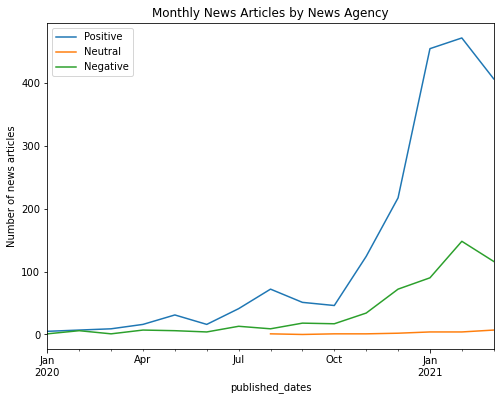

In [8]:
df['published_dates'] = pd.to_datetime(df['published_dates'])
#line chart of monthly streams
senti = df.set_index('published_dates')

fig= plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
#default is line so you can omit kind= parameter
data1 = senti[senti['analysis']=='Positive']['titles'].resample('M').count()
data2 = senti[senti['analysis']=='Neutral']['titles'].resample('M').count()
data3 = senti[senti['analysis']=='Negative']['titles'].resample('M').count()

data1.plot(ax=ax, label='Positive')
data2.plot(ax=ax, label='Neutral')
data3.plot(ax=ax, label='Negative')
#Uncomment for cleaner x labels
#ax.set_xticklabels([x.strftime('%Y-%m') for x in mon_df.index])

plt.legend()
plt.ylabel('Number of news articles')
plt.title('Monthly News Articles by News Agency')

In [9]:
cnn = df[df['news_org']=='CNN']
gma = df[df['news_org']=='GMA News']
mnt = df[df['news_org']=='Manila Times']
pna = df[df['news_org']=='Philippines News Agency']
phs = df[df['news_org']=='Philstar']
rpr = df[df['news_org']=='Rappler']
abn = df[df['news_org']=='abscbn']
ssr = df[df['news_org']=='sunstar']
mnb = df[df['news_org']=='manilabulletin']


In [10]:
import plotly.express as px

fig = px.scatter(cnn,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [11]:
import plotly.express as px

fig = px.scatter(gma,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [12]:
import plotly.express as px

fig = px.scatter(mnt,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [13]:
import plotly.express as px

fig = px.scatter(pna,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [14]:
import plotly.express as px

fig = px.scatter(phs,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [15]:
import plotly.express as px

fig = px.scatter(rpr,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [16]:
import plotly.express as px

fig = px.scatter(abn,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [17]:
import plotly.express as px

fig = px.scatter(ssr,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [18]:
import plotly.express as px

fig = px.scatter(mnb,
                x='polarity',
                y='subjectivity',
                color='analysis',
                size='subjectivity'
                )

fig.update_layout(title='Sentiment Analysis',
                shapes=[dict(
                    type='line',
                    yref='paper', y0=0, y1=1,
                    xref='x', x0=0, x1=0
                )]
                )

fig.show()

In [19]:
%%markdown
## WORDCLOUD EDAs

## WORDCLOUD EDAs


In [20]:
%%markdown
### wordcloud by TOPICS

### wordcloud by TOPICS


In [21]:
wordcloud_topics = pd.read_csv("datasets/wordcloud_dfs/wordcloud_topics.csv").drop(columns=["Unnamed: 0"])

In [22]:
wordcloud_topics

topic_id  topic_percentage_contribution  \
0        0.0                         0.9963   
1        1.0                         0.9916   
2        2.0                         0.9957   
3        3.0                         0.9957   
4        4.0                         0.9931   
5        5.0                         0.9962   
6        6.0                         0.9958   
7        7.0                         0.9955   
8        8.0                         0.9970   
9        9.0                         0.9976   
10      10.0                         0.9950   
11      11.0                         0.9960   
12      12.0                         0.9968   
13      13.0                         0.9951   
14      14.0                         0.9970   

                                             keywords  \
0   {'president': 0.014558297, 'duterte': 0.011627...   
1   {'government': 0.0137846125, 'city': 0.0109326...   
2   {'city': 0.031660516, 'government': 0.02738318...   
3   {'country': 0.011952396, 'trial': 0.009206621,...   
4   {'government': 0.010618527, 'health': 0.007339...   
5   {'health': 0.014467637, 'president': 0.0143584...   
6   {'government': 0.015279688, 'country': 0.01180...   
7   {'government': 0.012209898, 'country': 0.00851...   
8   {'country': 0.012821958, 'health': 0.009700252...   
9   {'health': 0.014934744, 'government': 0.008596...   
10  {'trial': 0.018067695, 'country': 0.0136931455...   
11  {'government': 0.01948422, 'city': 0.018231893...   
12  {'city': 0.0113896, 'health': 0.010153409, 'va...   
13  {'trial': 0.013723672, 'health': 0.010207429, ...   
14  {'government': 0.02292523, 'city': 0.014424616...   

                                                 text  
0   ['bong_go', 'president', 'duterte', 'file_phot...  
1   ['retailer', 'family', 'specialty', 'clinic', ...  
2   ['mayor', 'francisco', 'domagoso', 'reiterate'...  
3   ['update', 'develop', 'china', 'back', 'pharma...  
4   ['moderna', 'create', 'antibody', 'neutralize'...  
5   ['president', 'vicente_sotto', 'iii', 'suppose...  
6   ['national', 'government', 'close', 'complete'...  
7   ['senator', 'donate', 'critical', 'medical', '...  
8   ['pharmaceutical', 'association', 'represent',...  
9   ['even', 'pandemic', 'hit', 'cherokee_nation',...  
10  ['asian_development', 'bank_adb', 'extend', 't...  
11  ['land', 'transportation', 'franchising', 'reg...  
12  ['vax', 'rollout', 'visayas', 'ground', 'crew'...  
13  ['coronavirus', 'disease', 'develop', 'russia'...  
14  ['first', 'batch', 'set', 'transport', 'city',...

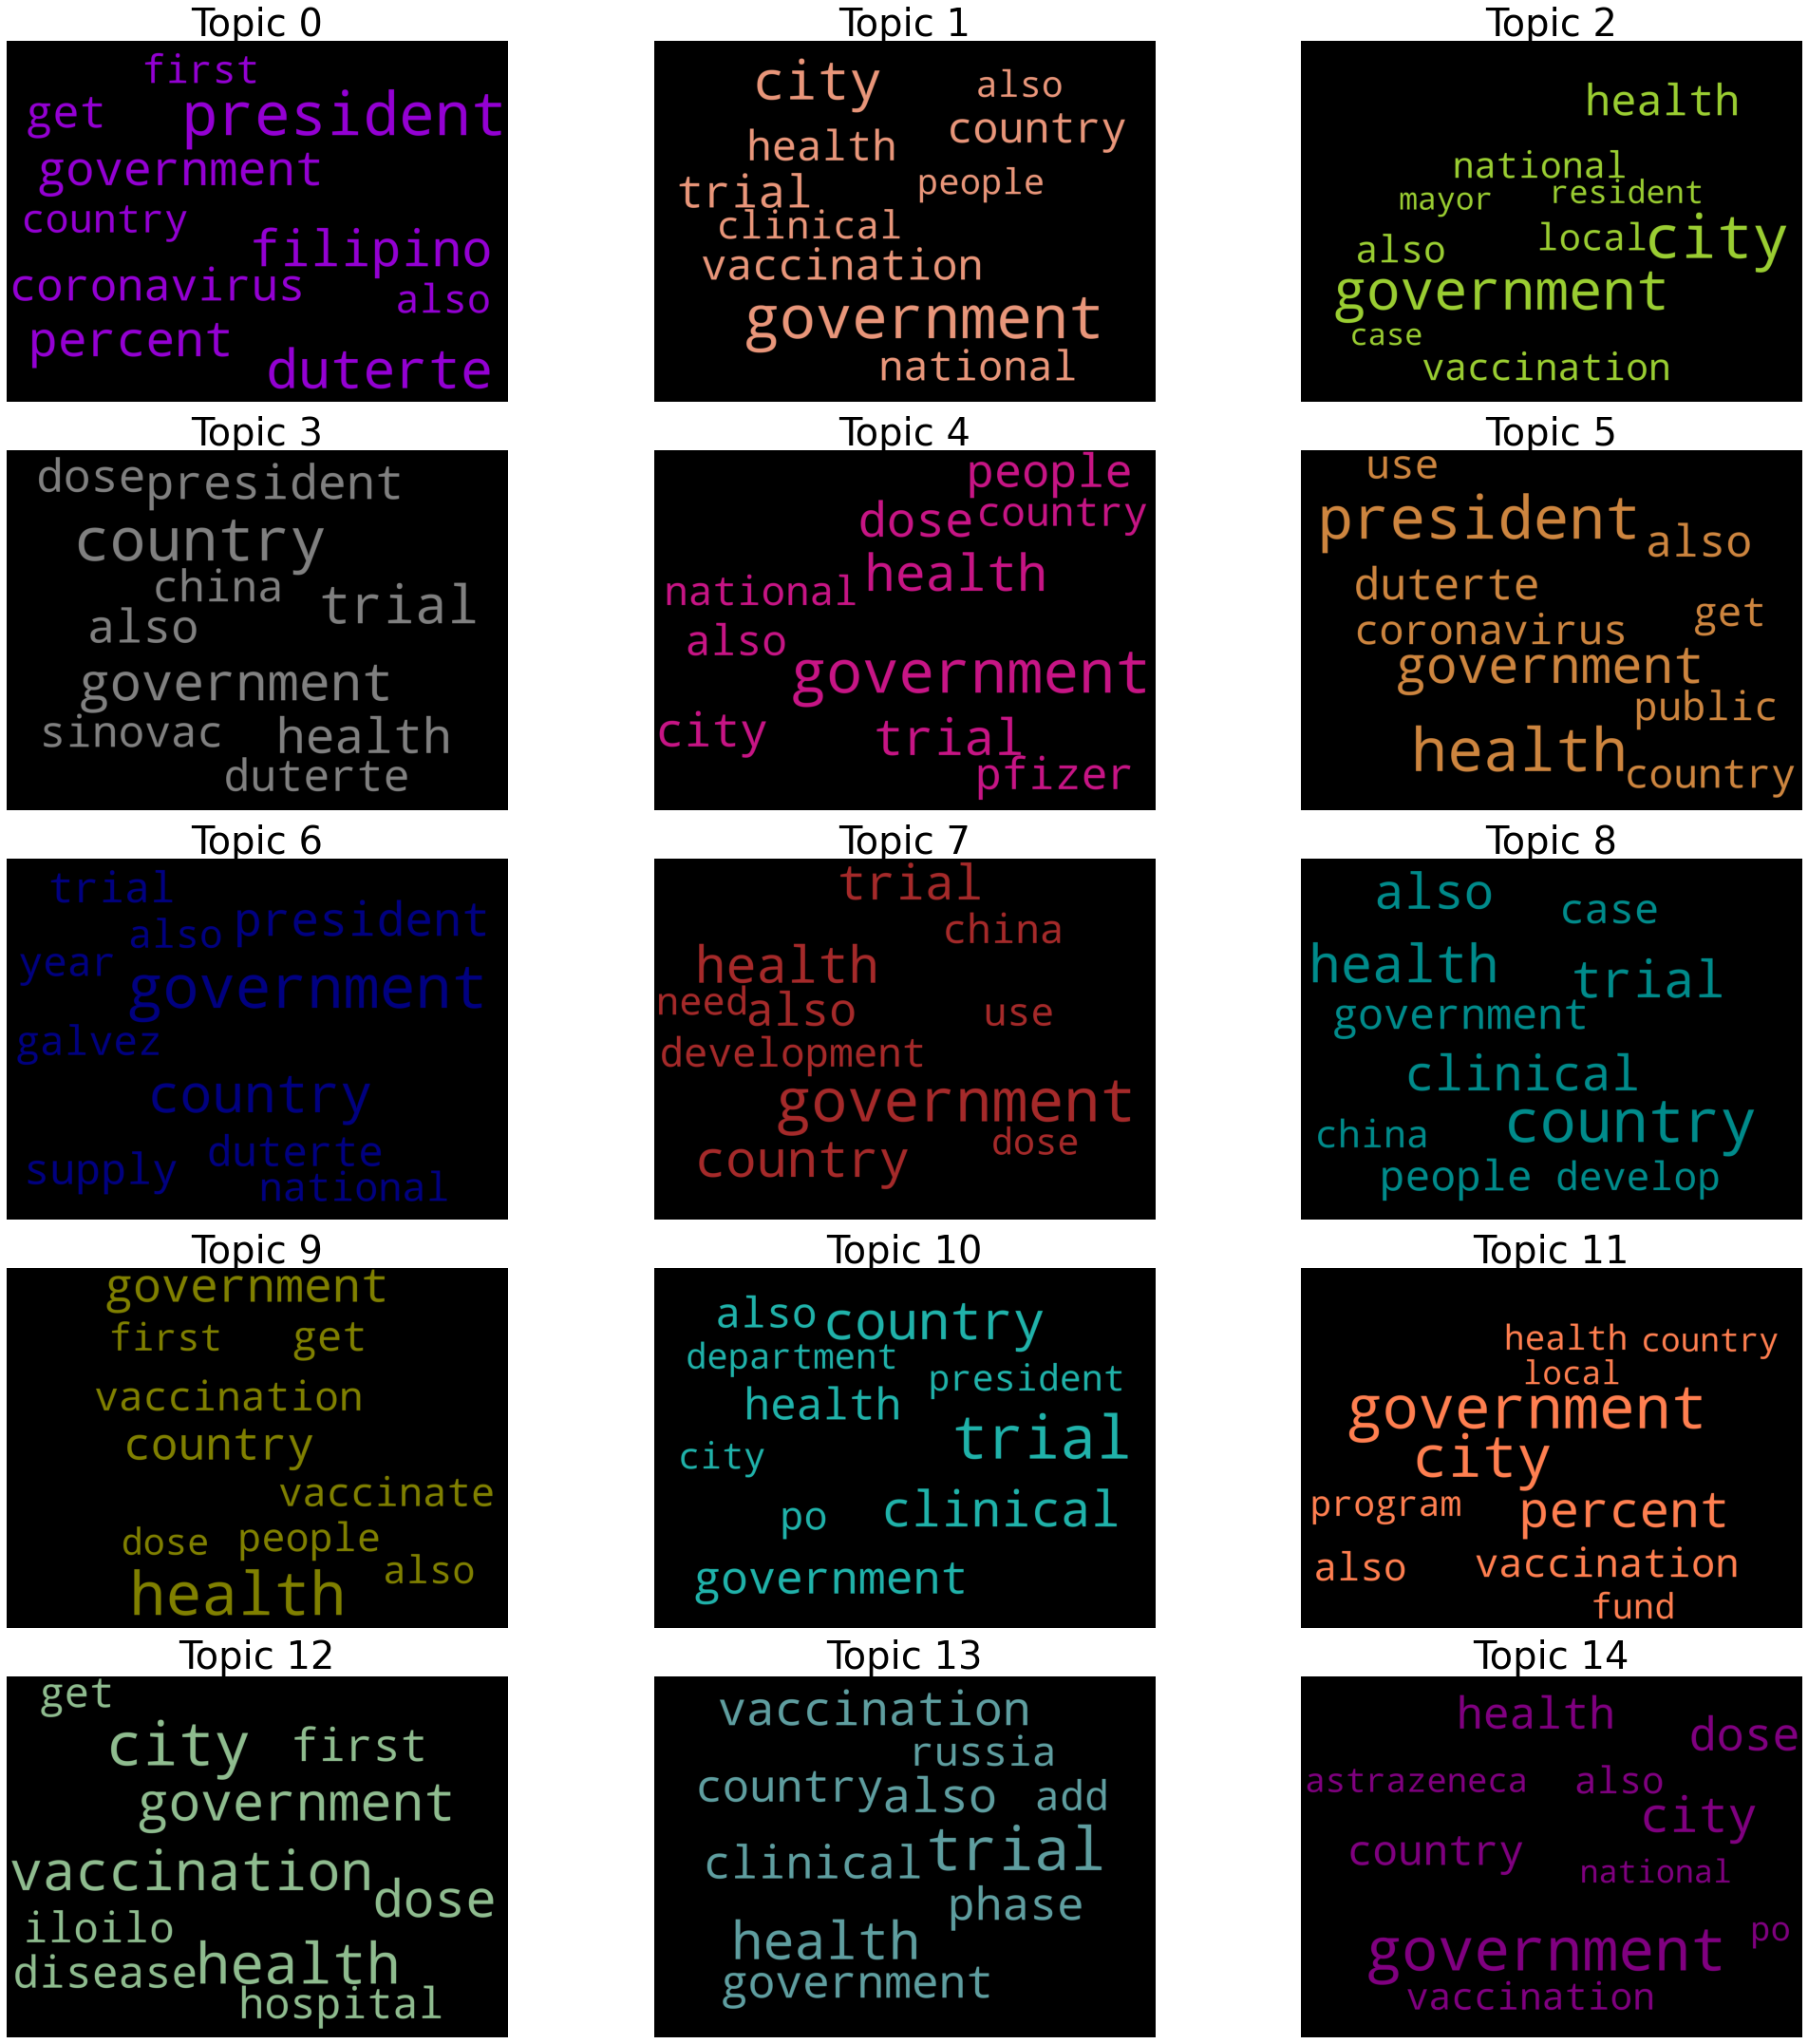

<Figure size 432x288 with 0 Axes>

In [23]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

# cols = ["gray","brown","darksalmon","peru","coral",
# "darkgoldenrod","olive","yellowgreen","darkseagreen",
# "forestgreen","lightseagreen","darkcyan","cadetblue",
# "steelblue","mediumblue","navy","rebeccapurple","darkviolet",
# "purple","mediumvioletred","crimson"]
cols = ["gray","brown","darksalmon","peru","coral",
"darkgoldenrod","olive","yellowgreen","darkseagreen",
"forestgreen","lightseagreen","darkcyan","cadetblue",
"steelblue","mediumblue","navy","rebeccapurple","darkviolet",
"purple","mediumvioletred","crimson"]
random.shuffle(cols)

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab20',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(5, 3, figsize=(30,30), sharex=True, sharey=True)

for i,ax in enumerate(axes.flatten()):
    topic_words = dict(eval(wordcloud_topics.iloc[i]["keywords"]))
    fig.add_subplot(ax)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=40))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
plt.savefig("wordcloud_per_topic")

In [24]:
%%markdown
## wordCloud by News SITE

## wordCloud by News SITE


In [25]:
wordcloud_topics = pd.read_csv("datasets/wordcloud_dfs/wordcloud_model.csv").drop(columns=["Unnamed: 0"])

In [26]:
wordcloud_topics

urls  \
0     https://www.rappler.com/newsbreak/explainers/w...   
1     https://www.rappler.com/newsbreak/iq/timeline-...   
2     https://www.rappler.com/nation/philippines-rec...   
3     https://www.rappler.com/nation/philippines-gra...   
4     https://www.rappler.com/nation/philippines-rec...   
...                                                 ...   
2523  https://mb.com.ph/2020/03/07/virus-folding-puz...   
2524  https://mb.com.ph/2020/02/25/needed-vaccine-in...   
2525  https://mb.com.ph/2020/02/22/phap-to-immediate...   
2526  https://mb.com.ph/2020/02/14/as-scientists-rac...   
2527  https://mb.com.ph/2020/02/12/scientists-financ...   

                                                 titles               authors  \
0     Here’s why COVID-19 vaccines haven’t arrived i...        SOFIA TOMACRUZ   
1     TIMELINE: The Philippines’ 2021 COVID-19 vacci...        SOFIA TOMACRUZ   
2     After initial delay, Philippines to receive As...        SOFIA TOMACRUZ   
3     Philippines grants emergency approval for Sino...        SOFIA TOMACRUZ   
4     Philippines receives first COVID-19 vaccine de...        SOFIA TOMACRUZ   
...                                                 ...                   ...   
2523  Virus-folding puzzle game might help find vacc...  manilabulletin_admin   
2524      Needed: vaccine & info on how Covid-1 spreads  manilabulletin_admin   
2525  PHAP to immediately bring new COVID-19 vaccine...  manilabulletin_admin   
2526  As scientists race to produce Covid-19 vaccine...  manilabulletin_admin   
2527  Scientists, financiers meet to develop vaccine...  manilabulletin_admin   

                  published_dates  \
0             2021-02-18 09:22:00   
1             2021-02-04 19:43:00   
2             2021-03-03 14:41:00   
3             2021-02-22 12:19:00   
4             2021-02-28 16:16:00   
...                           ...   
2523      March 7, 2020, 12:00 AM   
2524  February 25, 2020, 12:00 AM   
2525  February 22, 2020, 12:00 AM   
2526  February 14, 2020, 12:00 AM   
2527  February 12, 2020, 12:00 AM   

                                       articles_content        news_org  \
0     MANILA, PHILIPPINES\r\nThe Philippine governme...         Rappler   
1     MANILA, PHILIPPINES\r\n(UPDATED) On March 1, t...         Rappler   
2     MANILA, PHILIPPINES\r\n(UPDATED) Malacañang sa...         Rappler   
3     MANILA, PHILIPPINES\r\n(UPDATED) Its lower eff...         Rappler   
4     MANILA, PHILIPPINES\r\n(3rd UPDATE) The arriva...         Rappler   
...                                                 ...             ...   
2523  By Rizal ObanilThis development has the making...  manilabulletin   
2524  The search for a vaccine for the coronavirus, ...  manilabulletin   
2525  By Bernie Cahiles-MagkilatThe Pharmaceutical A...  manilabulletin   
2526  By Analou De VeraAn official of the World Heal...  manilabulletin   
2527  By Aaron RecuencoHealth experts from around th...  manilabulletin   

      dominant_topic  topic_percentage_contribution  \
0                6.0                         0.3358   
1               14.0                         0.8739   
2               14.0                         0.7087   
3                8.0                         0.5591   
4               14.0                         0.4348   
...              ...                            ...   
2523             0.0                         0.8133   
2524             8.0                         0.3332   
2525             8.0                         0.9970   
2526             8.0                         0.9574   
2527             8.0                         0.9059   

                                               keywords  \
0     {'government': 0.015279688, 'country': 0.01180...   
1     {'government': 0.02292523, 'city': 0.014424616...   
2     {'government': 0.02292523, 'city': 0.014424616...   
3     {'country': 0.012821958, 'health': 0.009700252...   
4     {'government': 0.02292523, 'city': 0.014424616...   
...     

In [27]:
def take_tf_idf(text):
    tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,norm='l2',encoding='latin-1',ngram_range=(1,1))
    features = tfidf.fit_transform(text)
    return tfidf.vocabulary_

In [28]:
def combine_text_by_group(df,column):
    df = df.groupby(column)
    texts_by_group = dict()

    for group in df:
        group_texts = group[1]["text"]
        group_name = group[1][column].iloc[0]
        combined_group_text = []

        for text in group_texts:
            combined_group_text.append(" ".join(eval(text)))
        texts_by_group[group_name] = take_tf_idf(combined_group_text)
        
    return texts_by_group

In [29]:
org_texts = combine_text_by_group(wordcloud_topics,"news_org")

In [ ]:
cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab20',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(3, 3, figsize=(30,30), sharex=True, sharey=True)
# cols = ["white","lightcoral","red","orangered","chocolate","peachpuff","gold","lawngreen","lime","palegreen",
#         "springgreen","lightcyan","cyan","aquamarine","deepskyblue","blue","dodgerblue",
# "mediumpurple","mediumorchid","violet","magenta","deeppink","crimson"]
cols = ["gray","brown","darksalmon","peru","coral",
"darkgoldenrod","olive","yellowgreen","darkseagreen",
"forestgreen","lightseagreen","darkcyan","cadetblue",
"steelblue","mediumblue","navy","rebeccapurple","darkviolet",
"purple","mediumvioletred","crimson"]

random.shuffle(cols)

for i,ax in enumerate(axes.flatten()):
    org = list(org_texts.keys())[i]
    topic_words = org_texts[org]
    fig.add_subplot(ax)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(org, fontdict=dict(size=40))
    plt.gca().axis('off')

fig.suptitle("Keywords by News Agency",fontsize=50)
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
plt.savefig("wordcloud_per_news_agency")

In [31]:
%%markdown
### WORDCLOUD BY POLARITY GROUP

### WORDCLOUD BY POLARITY GROUP


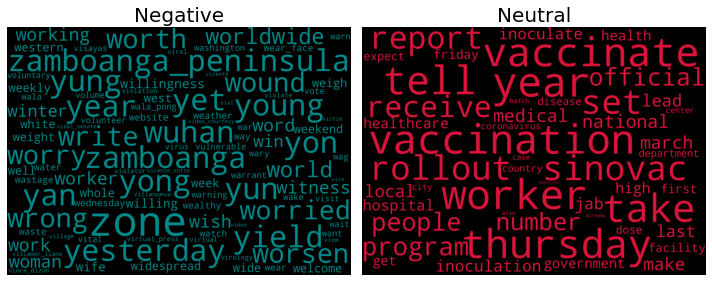

<Figure size 432x288 with 0 Axes>

In [32]:
analysis_group = combine_text_by_group(wordcloud_topics,"analysis")

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='black',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab20',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

fig, axes = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)

cols = ["darkcyan","crimson"]

for i,ax in enumerate(axes.flatten()):
    group = list(analysis_group.keys())[i]
    topic_words = analysis_group[group]
    fig.add_subplot(ax)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title(group, fontdict=dict(size=20))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
plt.savefig("wordcloud_by_polarity")